In [6]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import category_encoders as ce
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import pickle
import pandas as pd
from sklearn import tree

In [8]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('car_evaluation.csv')

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [10]:
# Now you can work with the DataFrame as needed
print(df.head())

  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [11]:
df.shape

(1727, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
df.isnull().sum()
#We can see that there are no missing values in the dataset

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:
  print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [15]:
df['class'].value_counts()
#The class target variable is ordinal in nature.

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [16]:
X = df.drop(['class'], axis=1)
y = df['class']

# DATA SPLITTING

In [17]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [18]:
# checking the shape of train and test
X_train.shape,X_test.shape

((1157, 6), (570, 6))

In [19]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [20]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5more,2,med,low
48,vhigh,vhigh,3,more,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,more,med,low
1043,med,high,4,more,small,low


# DATA ENCODING

In [21]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [22]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [23]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


# CREATING MODEL

In [24]:
# Create a Decision Tree Classifier with the "entropy" criterion
clf = DecisionTreeClassifier(criterion="entropy")

# TRAINING MODEL

In [25]:
# Train the classifier on the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

# PREDICT ON DATA

In [26]:
# Make predictions on the testing set
y_pred = clf.predict(X_test)

In [27]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9702


# PLOT

[Text(0.3638698630136986, 0.9615384615384616, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.3501712328767123, 0.8846153846153846, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.3775684931506849, 0.8846153846153846, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3638698630136986, 0.8076923076923077, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.3912671232876712, 0.8076923076923077, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.136986301369863, 0.7307692307692307, 'x[1] <= 1.5\nentropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.1232876712328767, 0.6538461538461539, 'entropy = 0.0\nsamples = 66\nvalue = [0, 0, 66, 0]'),
 Text(0.1506849315068493, 0.6538461538461539, 'x[1] <= 2.5\nentropy = 0.958\nsamples = 200\nvalue = [124, 0, 76, 0]'),
 Text(0.0684931506849315, 0.5769230769230769, 'x[0] <= 1.5\nentropy = 0.918\nsamples = 6

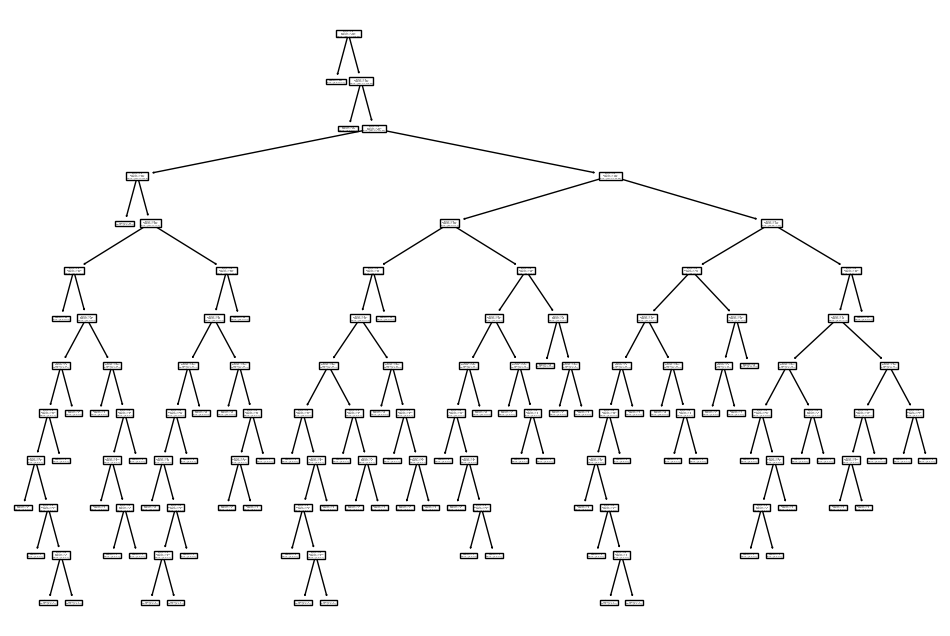

In [28]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf.fit(X_train, y_train))

In [29]:
# Define lists to store results
depths = [3, 5, 7, 9]
min_samples_splits = [2, 5, 10, 20]
results = []

# Perform systematic analysis
for depth in depths:
    for min_samples_split in min_samples_splits:
        # Create and train decision tree classifier
        clf = DecisionTreeClassifier(criterion="entropy", max_depth=depth, min_samples_split=min_samples_split, random_state=42)
        clf.fit(X_train, y_train)
        
        # Make predictions on test set
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results
        results.append((depth, min_samples_split, accuracy))

# Display results
print("Results:")
print("Depth\tMin Samples Split\tAccuracy")
for result in results:
    print("{}\t{}\t\t\t{:.4f}".format(result[0], result[1], result[2]))

# Find best parameters
best_params = max(results, key=lambda x: x[2])
print("\nBest Parameters (Depth, Min Samples Split, Accuracy):", best_params)


Results:
Depth	Min Samples Split	Accuracy
3	2			0.8053
3	5			0.8053
3	10			0.8053
3	20			0.8053
5	2			0.8789
5	5			0.8789
5	10			0.8789
5	20			0.8789
7	2			0.9281
7	5			0.9281
7	10			0.9281
7	20			0.9333
9	2			0.9614
9	5			0.9561
9	10			0.9368
9	20			0.9404

Best Parameters (Depth, Min Samples Split, Accuracy): (9, 2, 0.9614035087719298)


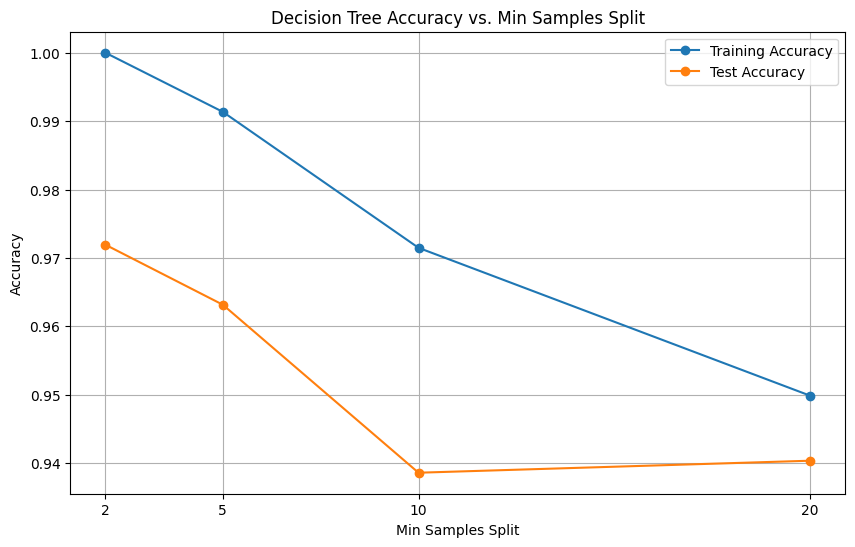

In [30]:
# Import necessary libraries
import numpy as np

# Define range of min_samples_split values to evaluate
min_samples_splits = [2, 5, 10, 20]

# Initialize lists to store accuracy scores
train_scores = []
test_scores = []

# Iterate over min_samples_split values
for min_samples_split in min_samples_splits:
    # Create Decision Tree Classifier with specified min_samples_split
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_split=min_samples_split, random_state=42)
    
    # Train the classifier on the training set
    clf.fit(X_train, y_train)
    
    # Calculate accuracy on training set
    train_accuracy = clf.score(X_train, y_train)
    train_scores.append(train_accuracy)
    
    # Calculate accuracy on test set
    test_accuracy = clf.score(X_test, y_test)
    test_scores.append(test_accuracy)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_scores, marker='o', label='Training Accuracy')
plt.plot(min_samples_splits, test_scores, marker='o', label='Test Accuracy')
plt.title('Decision Tree Accuracy vs. Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.xticks(min_samples_splits)
plt.legend()
plt.grid(True)
plt.show()
